# Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib.parse
import json

# Importing Source Reliability Data

In [2]:
with open('Dataset/MBFC/factuality.json') as f:
    data = json.load(f)

In [3]:
data

{'dailynewsbin.com': 'MIXED',
 'bluedotdaily.com': 'MIXED',
 'allthatsfab.com': 'MIXED',
 'dailyrecord.co.uk': 'MIXED',
 'certifiedpolitics.com': 'MIXED',
 'bluenationreview.com': 'MIXED',
 'content.news': 'MIXED',
 'alternet.org': 'MIXED',
 'citypaper.com': 'MIXED',
 'addictinginfo.org': 'MIXED',
 'democraticunderground.com': 'MIXED',
 'earthfirstjournal.org': 'MIXED',
 'breitbartunmasked.com': 'MIXED',
 'economyincrisis.org': 'MIXED',
 'themaven.net': 'TRUE',
 'dailydems.com': 'MIXED',
 'americanbridgepac.org': 'MIXED',
 'americannewsx.com': 'MIXED',
 'cnn.com': 'MIXED',
 'deepleftfield.info': 'MIXED',
 'extranewsfeed.com': 'MIXED',
 'dailykos.com': 'MIXED',
 'drudge.com': 'MIXED',
 'deepstatenation.com': 'MIXED',
 'codepink.org': 'MIXED',
 'crooksandliars.com': 'MIXED',
 'foreignpolicynews.org': 'MIXED',
 'mirror.co.uk': 'MIXED',
 'happy-foxie.com': 'MIXED',
 'elitedaily.com': 'MIXED',
 'gopocalypse.org': 'MIXED',
 'forwardprogressives.com': 'MIXED',
 'impeachdjtnow.com': 'MIXED',
 

In [4]:
type(data)

dict

In [5]:
len(data)

1664

In [6]:
def reliability(dict, key):
    
    if key in dict.keys():
        return dict[key]
    else:
        return 'UNKNOWN'

In [7]:
reliability(data,'bbc.co.uk')

'TRUE'

In [8]:
dict = {}
for p in data:
    pos = 0
    for i in range(len(p)):
        if p[i] == '.':
            pos = i
            break
    dict[p[:pos]] = data[p]

In [9]:
dict

{'dailynewsbin': 'MIXED',
 'bluedotdaily': 'MIXED',
 'allthatsfab': 'MIXED',
 'dailyrecord': 'TRUE',
 'certifiedpolitics': 'MIXED',
 'bluenationreview': 'MIXED',
 'content': 'MIXED',
 'alternet': 'MIXED',
 'citypaper': 'MIXED',
 'addictinginfo': 'MIXED',
 'democraticunderground': 'MIXED',
 'earthfirstjournal': 'MIXED',
 'breitbartunmasked': 'MIXED',
 'economyincrisis': 'MIXED',
 'themaven': 'TRUE',
 'dailydems': 'MIXED',
 'americanbridgepac': 'MIXED',
 'americannewsx': 'MIXED',
 'cnn': 'FALSE',
 'deepleftfield': 'MIXED',
 'extranewsfeed': 'MIXED',
 'dailykos': 'MIXED',
 'drudge': 'MIXED',
 'deepstatenation': 'MIXED',
 'codepink': 'MIXED',
 'crooksandliars': 'MIXED',
 'foreignpolicynews': 'MIXED',
 'mirror': 'MIXED',
 'happy-foxie': 'MIXED',
 'elitedaily': 'MIXED',
 'gopocalypse': 'MIXED',
 'forwardprogressives': 'MIXED',
 'impeachdjtnow': 'MIXED',
 'meanlefthook': 'MIXED',
 'modernliberals': 'MIXED',
 'intrepidreport': 'MIXED',
 'liberalamerica': 'MIXED',
 'leftoverrights': 'MIXED',
 '

In [10]:
reliability(dict,'bbc')

'TRUE'

In [11]:
reliability(dict,'sputniknews')

'MIXED'

In [12]:
# Adding some domains in dict that has to be removed from search result

rem = ['translate', 'pinterest', 'shutterstock', 'linkedin', 'merriam-webster', 'amazon', 'unsplash', 'facebook', 
       'myntra', 'dictionary', 'youtube', 'flipkart', 'developer', 'twitter', 'webcache', 'reddit', 'britannica']

for dom in rem:
    dict[dom] = 'FALSE'

In [13]:
def reliability_from_link(link):
    
    url = str(link)

    if url[:5] == 'https':
        url = url[8:]
    else:
        url = url[7:]

    pos = 0
    for i in range(len(url)):
        if url[i] == '.':
            pos = i
            break
    
    if reliability(dict,url[:pos]) != 'UNKNOWN':
        return reliability(dict,url[:pos])

    url = url[pos+1:]

    pos = len(url)
    for i in range(len(url)):
        if url[i] == '.':
            pos = i
            break
    
    if reliability(dict,url[:pos]) != 'UNKNOWN':
        return reliability(dict,url[:pos])
    else:
        return 'UNKNOWN'

In [14]:
reliability_from_link('https://chicago.suntimes.com/2020/1/27/21111134/coronavirus-china-deaths-us-evacuation')

'TRUE'

In [15]:
reliability_from_link('https://www.pinterest.com/pin/658932989222547398/')

'FALSE'

# Importing Dataset

In [16]:
data = pd.read_csv('Dataset/Data/Target/all_targets.csv')

In [17]:
data.head()

,Unnamed: 0,ID,Target_url,Image_url,Target_text,label
0,0,Rtr0,https://www.reuters.com/,https://s2.reutersmedia.net/resources/r/?m=02&...,People observe a minute of silence at the Troc...,REAL
1,1,Rtr1,https://www.reuters.com/,https://s2.reutersmedia.net/resources/r/?m=02&...,Migrants and refugees wait to cross Greece's b...,REAL
2,2,Rtr2,https://www.reuters.com/,https://s3.reutersmedia.net/resources/r/?m=02&...,A tattoo on the knuckles of a Klansman reads �...,REAL
3,3,Rtr3,https://www.reuters.com/,https://s3.reutersmedia.net/resources/r/?m=02&...,Shi'ite fighters fire a rocket during clashes ...,REAL
4,4,Rtr4,https://www.reuters.com/,https://s3.reutersmedia.net/resources/r/?m=02&...,Smoke and ash rise from the Calbuco volcano as...,REAL


In [18]:
main_img_url = data.iloc[:,3].values

In [19]:
main_img_url

array(['https://s2.reutersmedia.net/resources/r/?m=02&d=20160101&t=2&i=1106230525&w=780&fh=&fw=&ll=&pl=&sq=&r=2016-01-01T053014Z_20588_LR2EBBG0VEMRC_RTRMADP_0_FRANCE-SHOOTING',
       'https://s2.reutersmedia.net/resources/r/?m=02&d=20160101&t=2&i=1106230479&w=780&fh=&fw=&ll=&pl=&sq=&r=2016-01-01T053014Z_20588_GF10000196395_RTRMADP_0_EUROPE-MIGRANTS-GREECE',
       'https://s3.reutersmedia.net/resources/r/?m=02&d=20160101&t=2&i=1106230470&w=780&fh=&fw=&ll=&pl=&sq=&r=2016-01-01T053014Z_20588_GF10000160795_RTRMADP_0_USA-KKK',
       ...,
       'https://media.vanityfair.com/photos/5ec6bdc5cab1177eb587474f/16:9/w_1280,c_limit/MichaelMoore-2020-GettyImages-1196435559.jpg',
       'https://img-s-msn-com.akamaized.net/tenant/amp/entityid/BB14rJS9.img?h=200&w=300&m=6&q=60&o=f&l=f',
       'https://images.foxtv.com/static.fox5ny.com/www.fox5ny.com/content/uploads/2020/05/724/407/GETTY-TWITTER-COVID.jpg?ve=1&tl=1'],
      dtype=object)

In [20]:
type(main_img_url)

numpy.ndarray

In [21]:
main_img_url[0]

'https://s2.reutersmedia.net/resources/r/?m=02&d=20160101&t=2&i=1106230525&w=780&fh=&fw=&ll=&pl=&sq=&r=2016-01-01T053014Z_20588_LR2EBBG0VEMRC_RTRMADP_0_FRANCE-SHOOTING'

In [22]:
def url_encoding(img_url):
    
    return urllib.parse.quote(img_url)

In [23]:
url_encoding(main_img_url[0])

'https%3A//s2.reutersmedia.net/resources/r/%3Fm%3D02%26d%3D20160101%26t%3D2%26i%3D1106230525%26w%3D780%26fh%3D%26fw%3D%26ll%3D%26pl%3D%26sq%3D%26r%3D2016-01-01T053014Z_20588_LR2EBBG0VEMRC_RTRMADP_0_FRANCE-SHOOTING'

# Extraction

In [24]:
def search_results_url_using_rapidapi(img_url):
    
    img_url = url_encoding(img_url)
    
    url = "https://google-reverse-image-search.p.rapidapi.com/imgSearch"

    image_url = img_url

    querystring = {"url":image_url}

    headers = {
        'x-rapidapi-key': "4883b3e78bmsh362116ac7c98734p14be33jsnbd0b330a6e32",
        'x-rapidapi-host': "google-reverse-image-search.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    print(type(response.text))

    print(response.text)
    
    index = len('{"imgUrl":"') + len(image_url) + len('","googleSearchResult":"')

    google_search_url = response.text[index:len(response.text)-2]

    print(google_search_url)
    
    return google_search_url

In [25]:
def search_results_url(img_url):
    
    img_url = url_encoding(img_url)
    
    url = 'https://www.google.com/searchbyimage?&image_url=' + img_url
    
    print('Requested URL : ' , url)
    
    return url

In [26]:
url = search_results_url(main_img_url[10])

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}

response = requests.get(url,headers=headers)

content = BeautifulSoup(response.content, 'html.parser')

print('Status code : ' , response.status_code)
print(response.history)
print('Redirected URL : ' , response.url)

Requested URL :  https://www.google.com/searchbyimage?&image_url=https%3A//s1.reutersmedia.net/resources/r/%3Fm%3D02%26d%3D20160101%26t%3D2%26i%3D1106230490%26w%3D780%26fh%3D%26fw%3D%26ll%3D%26pl%3D%26sq%3D%26r%3D2016-01-01T053014Z_20588_GF10000269309_RTRMADP_0_MIDEAST-CRISIS-SYRIA
Status code :  200
[<Response [302]>]
Redirected URL :  https://www.google.com/search?tbs=sbi:AMhZZivzkYyR4h26OwrIPFa_1L_1qStIly7CNdkiTkQWh99c5to_1lx9FaDJIspUCo0Eyc-9SxbQ8g9otTAFqHjFRQbiZf-omwnTGXuWOAbYFgg3nK3HGnosINo8KSdeYGsNu9eFyQARyqOo-04i2ZNc578A-fZxumsO23IwViXmWZ9lCy_1LPxDC4Wt5L3N_1lr_1okxdrsvvkAyO0GLTad_1ttHCCAxj3gqxgs-GHQnPwrghgAjHs0d577yUm6z-5xMFjxG_1Zmzqm_1ex-5qUPESHbTzIhfcVIEa35b_1_1ppz8_14cCgdNm8aitJuNClXG9TVrKJEPUZR27-KxPAbVyWHzO27RfqaAKPHy1iOA


In [27]:
with open("GoogleSearchResultPage.html", "w") as file:
    file.write(str(content))

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google Search</title><script nonce="1uRN2gRo3NTatijW9NWEQg==">(function(){window.google={kEI:'uMivYMbGHZfmwQPM66T4BA',kEXPI:'31',kBL:'tVAm'};google.sn='web';google.kHL='en-IN';})();(function(){
var f,h=[];function k(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||f}function l(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function m(a,b,c,d,g){var e="";c||-1!=b.search("&ei=")||(e="&ei="+k(d),-1==b.search("&lei=")&&(d=l(d))&&(e+="&lei="+d));d="";!c&&window._cshid&&-1==b.search("&cshid=")&&"slh"!=a&&(d="&cshid="+window._cshid);c=c||"/"+(g||"gen_204")+"?atyp=i&ct="+a+"&cad="+b+e+"&zx="+Date.now()+d;/^http:/i.test(c)&&"https:"==window.location
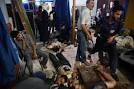
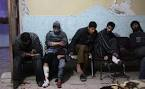
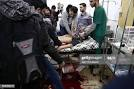
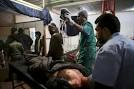
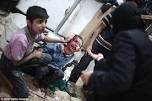
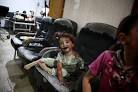
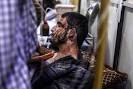
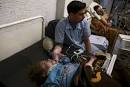
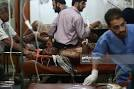
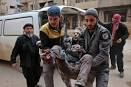
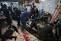
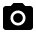
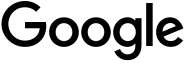

In [28]:
print(content)

In [29]:
link_containers = content.select('#search a')
print(link_containers)

[<a data-ved="2ahUKEwjGgoSEpOrwAhUXc3AKHcw1CU8QFjAAegQIBhAD" href="https://en.wikipedia.org/wiki/Douma_chemical_attack" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://en.wikipedia.org/wiki/Douma_chemical_attack&amp;ved=2ahUKEwjGgoSEpOrwAhUXc3AKHcw1CU8QFjAAegQIBhAD"><br/><h3 class="LC20lb DKV0Md">Douma chemical attack - Wikipedia</h3><div class="TbwUpd NJjxre"><cite class="iUh30 Zu0yb qLRx3b tjvcx">https://en.wikipedia.org<span class="dyjrff qzEoUe"> › wiki › Douma_chemical_attack</span></cite></div></a>, <a aria-expanded="false" aria-haspopup="true" aria-label="Result options" class="GHDvEf" data-ved="2ahUKEwjGgoSEpOrwAhUXc3AKHcw1CU8Q7B0wAHoECAYQBg" href="#" jsaction="PZcoEd;keydown:wU6FVd;keypress:uWmNaf" role="button"><span class="gTl8xb"></span></a>, <a class="fl" href="https://webcache.googleusercontent.com/search?q=cache:HhJ7lzJDwE8J:https://en.wikipedia.org/wiki/Douma_chemical_attack+&amp;cd=1&amp;hl=en&amp;ct=clnk&amp;gl=in" ping="/url?sa=t&amp;source=web&amp;rct=j&amp

In [30]:
links =[]
for link_container in link_containers:
    link = ''
    try:
        link = link_container['href']
    except:
        continue
    links.append(link)

print(links)

['https://en.wikipedia.org/wiki/Douma_chemical_attack', '#', 'https://webcache.googleusercontent.com/search?q=cache:HhJ7lzJDwE8J:https://en.wikipedia.org/wiki/Douma_chemical_attack+&cd=1&hl=en&ct=clnk&gl=in', 'https://www.youtube.com/watch?v=_xcsH2EJOis', '/search?tbs=simg:CAESjQIJrpFRJa0MKjQagQILEKjU2AQaAghCDAsQsIynCBo6CjgIBBIUnCuEOLI8tAaCPaAbjzO5P9kI7jwaGvZHZZlZ3BNt83PEe4DySy1aXrgO7pH5Yza5IAUwBAwLEI6u_1ggaCgoICAESBH_1Jl5UMCxCd7cEJGpYBCh8KCGFjY2lkZW502qWI9gMPCg0vZy8xMWI3NmZ5ajJyChgKBWJsb29k2qWI9gMLCgkvai85OGN0M3kKIAoNYm9kaWx5IGZsdWlkc9qliPYDCwoJL2ovMjl5d3FmChoKB3dlYXBvbnPapYj2AwsKCS9qLzg2aG15bQobCghvZmZpY2lhbNqliPYDCwoJL20vMDM1eTMzDA&q=syria+douma+hospital&tbm=isch&sa=X&ved=2ahUKEwjGgoSEpOrwAhUXc3AKHcw1CU8QjJkEegQIAhAB', '/search?q=syria+douma+hospital&tbm=isch&source=iu&ictx=1&tbs=simg:CAESjQIJrpFRJa0MKjQagQILEKjU2AQaAghCDAsQsIynCBo6CjgIBBIUnCuEOLI8tAaCPaAbjzO5P9kI7jwaGvZHZZlZ3BNt83PEe4DySy1aXrgO7pH5Yza5IAUwBAwLEI6u_1ggaCgoICAESBH_1Jl5UMCxCd7cEJGpYBCh8KCGFjY2lkZW502qWI9gMPCg0vZy8xMWI

In [31]:
def is_valid_link(link):
    if len(link)<13:
        return False
    elif link[0:4]!='http':
        return False
    elif reliability_from_link(link)=='FALSE' or reliability_from_link(link)=='UNKNOWN':
        return False
    else:
        return True

In [32]:
def get_filtered_links(links):
    res = []
    for link in links:
        if is_valid_link(link):
            res.append(link)
        if len(res)==10:
            break
    return res

In [33]:
links = get_filtered_links(links)
print(len(links))
print(links)

6
['https://en.wikipedia.org/wiki/Douma_chemical_attack', 'http://america.aljazeera.com/multimedia/photo-gallery/2015/12/photos-inside-a-field-hospital-in-douma-syria.html', 'https://www.nytimes.com/2015/12/19/world/middleeast/syria-talks-isis.html', 'https://www.reuters.com/news/picture/syria-the-war-idUSRTX25FUK', 'https://www.reuters.com/news/picture/syria-the-war-idUSRTX26KDQ', 'https://www.reuters.com/news/picture/photos-of-the-week-idUSRTX1Z5WQ']


In [34]:
url = links[2]

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}

response = requests.get(url,headers=headers)

content = BeautifulSoup(response.content, 'html.parser')

In [35]:
print(content)

<!DOCTYPE html>

<html class="story nytapp-vi-article" lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<title data-rh="true">After Years of War in Syria, U.N. Passes Resolution on Talks - The New York Times</title>
<meta content="2015-12-18T09:38:38.000Z" data-rh="true" property="article:published_time"/><meta content="2015-12-19T01:45:22.000Z" data-rh="true" property="article:modified_time"/><meta content="en" data-rh="true" http-equiv="Content-Language"/><meta content="noarchive" data-rh="true" name="robots"/><meta content="100000004100770" data-rh="true" name="articleid"/><meta content="nyt://article/7ab43b2e-5cf4-55e8-84bb-dec326e03f82" data-rh="true" name="nyt_uri"/><meta content="pubp://event/ed17df8f202c475880c5aaa3f187e7e3" data-rh="true" name="pubp_event_id"/><meta content="For the first time in the nearly five-year civil war in Syria, the Security Council backed a process for resolving the conflict." data-rh="true" name="description"/><meta content="https://

In [36]:
texts = content.findAll('p')

len(texts)

26

In [37]:
extracted_text = '';
for text in texts:
    extracted_text += text.get_text() + ' '
print(extracted_text)

Advertisement Supported by By Somini Sengupta and David E. Sanger UNITED NATIONS — For the first time since the nearly five-year-old Syrian civil war began, world powers agreed on Friday at the United Nations Security Council to embrace a plan for a cease-fire and a peace process that holds the distant prospect of ending the conflict. A resolution adopted unanimously by the Security Council reflected a monthslong effort by American and Russian officials, who have long been at odds over the future of Syria, to find common national interests to stop the killing, even if they cannot yet agree on Syria’s ultimate future. But there remain sharp disagreements to be reconciled between the American and Russian positions, and huge uncertainty about what the plan will mean on the ground. A dizzying array of armed forces have left Syria in ruins, killed 250,000 and driven four million refugees out of the country, threatening to destabilize the nations where they are seeking new homes. “This counc

In [38]:
type(extracted_text)

str

In [39]:
len(extracted_text)

8019

In [40]:
source_images = content.findAll('img')

len(source_images)

2

In [41]:
source_images

[<img alt="Medics treated victims in a field hospital last weekend after what activists said were air and missile strikes in Damascus, Syria." class="css-11cwn6f" decoding="async" sizes="((min-width: 600px) and (max-width: 1004px)) 84vw, (min-width: 1005px) 60vw, 100vw" src="https://static01.nyt.com/images/2015/12/19/world/middleeast/SUB-SYRIA/SUB-SYRIA-articleLarge.jpg?quality=75&amp;auto=webp&amp;disable=upscale" srcset="https://static01.nyt.com/images/2015/12/19/world/middleeast/SUB-SYRIA/SUB-SYRIA-articleLarge.jpg?quality=90&amp;auto=webp 600w,https://static01.nyt.com/images/2015/12/19/world/middleeast/SUB-SYRIA/SUB-SYRIA-jumbo.jpg?quality=90&amp;auto=webp 1024w,https://static01.nyt.com/images/2015/12/19/world/middleeast/SUB-SYRIA/SUB-SYRIA-superJumbo.jpg?quality=90&amp;auto=webp 2048w"/>,
 <img alt="The United Nations Security Council voted on Friday. Despite lingering disagreements, the resolution was adopted 15-0." class="css-1m50asq" decoding="async" sizes="((min-width: 600px) 

In [42]:
src_img_links =[]
for source_image in source_images:
    link = ''
    try:
        link = source_image['src']
    except:
        continue
    src_img_links.append(link)

print(src_img_links)

['https://static01.nyt.com/images/2015/12/19/world/middleeast/SUB-SYRIA/SUB-SYRIA-articleLarge.jpg?quality=75&auto=webp&disable=upscale', 'https://static01.nyt.com/images/2015/12/19/world/JP-SYRIA/JP-SYRIA-articleLarge.jpg?quality=75&auto=webp&disable=upscale']


In [43]:
def get_complete_image_url(host_url,image_link):
    
    pref=''
    dom=''
    
    if host_url[0:5] == 'http:':
        pref = 'http://'
        for i in range(7,len(host_url)):
            if(host_url[i]=='/'):
                dom = host_url[7:i]
                break
    else:
        pref = 'https://'
        for i in range(8,len(host_url)):
            if(host_url[i]=='/'):
                dom = host_url[8:i]
                break
    
    if len(image_link)<2:
        return ''
    elif image_link[0:2]=='//':
        return pref + image_link[2:]
    elif image_link[0]=='/':
        return pref + dom + image_link
    elif len(image_link)<13:
        return ''
    elif image_link[0:4]!='http':
        return ''
    else:
        return image_link

In [45]:
get_complete_image_url(url,src_img_links[1])

'https://static01.nyt.com/images/2015/12/19/world/JP-SYRIA/JP-SYRIA-articleLarge.jpg?quality=75&auto=webp&disable=upscale'